<a href="https://colab.research.google.com/github/Sinrez/mipt_python/blob/main/HW_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее #2
Этот ноутбук предназначен для домашнего решения. Проверяться он будет вашим семинаристом и ассистентами, весь код можно и нужно писать внутри, затем сохранить и отправить в систему. В случае если вы отстали и нагоняете, вы всё ещё можете сдать домашнее после дедлайна, но в приоритете на проверку будут свежие сдачи, поэтому фидбек может задержаться.

В этом задании вам предлогается реализовать структуру из нескольких классов и написать для них тесты. Задание можно выполнять сразу в ноутбуке, или, если вам так удобнее - в проекте в PyCharm (в таком случае можете так же приложить ссылку на получившийся github репозиторий)

# Постановка задачи

Вам предлагается реализовать систему, описывающую работу склада товаров. 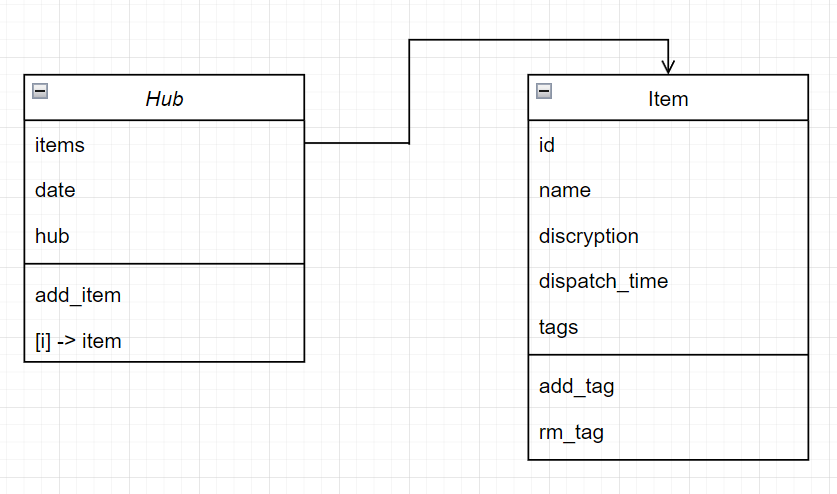

Два основных Класса:
* Hub (синглтон, класс объекта нашего склада)
* Item (класс предметов, хранящихся на складе)

Hub должен поддерживать обращение к предметам по индексам и иметь метод добавления предмета в лист _items, поле _date с датой в любом формате, а так же быть синглтоном (при любом вызове Hub() возвращается один и тот же инстантс объекта)

Item должен иметь уникальный _id, наиминование, описание, дату, в которую он должен быть отправлен а так же множество тегов _tags. Должен поддерживать добавление и удаление тегов. (В нашей задаче теги это просто строки ненулевой длинны, например "Хрупкий", "Скоропортящийся" и т.д.)


In [ ]:
from uuid import uuid4

class Hub:
    """Класс склад"""
    __instance = None

    def __init__(self):
      pass

    def __new__(cls):
        if cls.__instance is None:
            cls.__instance = super().__new__(cls)
            cls.__instance._items = []
            cls.__instance._date = ""
            cls.__instance._hub = ""
        return cls.__instance

    def add_item(self, item):
        self._items.append(item)

    def get_item_by_index(self, index):
        return self._items[index]

    def get_all_items(self):
        return self._items

class Item:
    """Класс предмет"""
    _id_counter = 0

    def __init__(self, name, description, date):
        self._id = hash(uuid4())
        self._name = name
        Item._id_counter += 1
        self._description = description
        self._date = date
        self._tags = set()

    def add_tag(self, tag):
        self._tags.add(tag)

    def remove_tag(self, tag):
        self._tags.remove(tag)

    def get_id(self):
      # return str(self._id).strip()
        return self._id

    def get_name(self):
        return self._name

    def get_description(self):
        return self._description

    def get_date(self):
        return self._date

    def get_tags(self):
        return self._tags

Все модификации класса можно выполнять переопределяя классы в ноутбуке, добавляя к ним методы присвоением (заведя новую функцию def f и потом присвоив Hub.func = f), или изменением описания класса в самом первом блоке.

Выбирайте любой удобный вам метод работы, главное чтобы по итогу получился рабочий класс, выполняющий условия

## Упрощение работы с объектами

Для того чтобы нам было проще работать с нашими объектами, давайте сразу переопределим для них очевидно полезные методы.

* Переопределите в классах метод `__init__`
** Для Item убедитесь что id всё время генерируется новый

* Переопределите в классах методы `__str__` и `__repr__`
** Для Hub в `__repr__` в строку включите первые 3 (или меньше) предмета из _items
** Для Item в `__repr__` в строку включите первые 3 (или меньше) тега из _tags и его id
** Реализацию `__str__` продумайте сами, учитывая то что вам может потребоваться знать про эти объекты для дальнейшей работы с ними

* Переопределите метод `__len__` для этих классов
** Для Hub функция len(hub) должна возвращать количество предметов на данный момент
** Для Item функция len(item) должна возвращать количество тегов этого предмета


In [ ]:
class ItemUniq(Item):
    _id_list = []
    """Класс предмет: добавлено формирование уникальных id и хеширование"""
    def __init__(self, name, description, date, cost = 0):
        while True:
            self._id = hash(uuid4())
            if self._id not in ItemUniq._id_list:
                ItemUniq._id_list.append(self._id)
                break
            else:
              raise ValueError("Опа! Поймали неуникальный идентификтор!")
        self._name = name
        Item._id_counter += 1
        self._description = description
        self._date = date
        self._tags = set()
        self._cost = cost


def hub_len(self):
     return len(self._items)

def item_len(self):
     return f"Это класс Item с {len(self._tags)} тегами"

def hub_str(self):
     return f"Это класс Hub с {len(self._items)} элементами"

def item_str(self):
  return str(self._id)

def item_len(self):
     return len(self._tags)

def hub_repr(self):
    'Описание метода, не обязательно для magic методов с __, но рекомендована для всех ваших авторских методов, например add_tag(tag)'
    return f"Это класс Hub с {len(self._items)} элементами"

def item_repr(self):
  'переопределенный для repr для item'
  # return f"Это класс Item{self._id_counter} с id {self._id}"
  return str(self._id)

Hub.__repr__ = hub_repr
Hub.__str__ = hub_str
Hub.__len__ = hub_len
ItemUniq.__repr__ = item_repr
ItemUniq.__str__ = item_str
ItemUniq.__len__ = item_len

У нас уже много тяжёлого функционала, и дальше его станет только больше. Для того чтобы контроллировать что всё выполняется корректно, можно сделать блоки кода с явной проверкой того что нужный функционал работает:

In [ ]:
h1 = Hub()
h2 = Hub()
print("Hub выполняет функционал Синглтона" if h1 is h2 else "Два объекта Hub не являются одним инстансом")
print(h1)
print(h1.__repr__)

item1 = ItemUniq('Вешалка','супер вешалка', '29.11.2023')
print(item1)
item2 = ItemUniq('Стол','стол', '29.11.2023')
print(item2)
print(item2.__repr__)
print("Item создаёт разные id" if item1._id != item2._id else "Item не создаёт разные id")

Hub выполняет функционал Синглтона
Это класс Hub с 0 элементами
<bound method hub_repr of Это класс Hub с 0 элементами>
233008292869704414
1534369666050270034
<bound method item_repr of 1534369666050270034>
Item создаёт разные id


Но такое решение плохо масштабируется и считается плохим тоном. Вместо этого давайте использовать библиотеку unittest

Реализуйте проверку функционала Синглтона у Hub, разных id у Item и корректность работы у len (для последнего создайте объекты, закиньте в них несколько предметов и тегов, и убедитесь что их количество совпадает)

In [ ]:
import unittest

class TestHub(unittest.TestCase):
    def test_hub_singleton(self):
        'Проверка того что hub - синглтон' # небольшая документация к тесту
        self.assertTrue(Hub() is Hub())

    def test_len(self):
        'Проверка того что при добавлении предметов меняется значение len(item)'
        self.h1 = Hub()
        len_before =  self.h1.__len__()
        for i in range(5):
            #h.add_item(Item()), ваш конструктор может отличаться, передайте нужные параметры
            name = 'Вешалка' + str(i)
            self.h1.add_item(ItemUniq(name,'супер вешалка', '29.11.2023'))
            # pass
        # print(h.get_all_items())
        self.assertGreaterEqual(len( self.h1), len_before)



class TestItem(unittest.TestCase):
    def test_item_id(self):
        'Проверка того что у разных Items разные id'
        self.assertTrue(ItemUniq('Вешалка','супер вешалка', '29.11.2023').get_id() != ItemUniq('Стул','супер стул', '29.11.2023').get_id())
        # pass # Реализуйте проверку того что у разных Items разные id

    def test_len(self):
        'Проверка того что при добавлении тэгов меняется значение len(item)'
        # pass # Реализуйте проверку того что при добавлении тэгов меняется значение len(item)
        item3 = ItemUniq('Стол','супер стол', '29.11.2023')
        item3.add_tag('например_первый_тег')
        len_before = item3.__len__()
        for i in range(3):
          tag_name = 'test_tag'+str(i)
          item3.add_tag(tag_name)
        self.assertGreaterEqual(item3.__len__(), len_before, 'Значение не изменилось! Ахтунг!')


    def test_equal_tags(self):
        'Проверка того что если к предмету добавить два идентичных тега - их колчество будет один'
        # pass # Реализуйте проверку того что если к предмету добавить два идентичных тега - их колчество будет один
        item4 = ItemUniq('Шкаф','офигенный шкаф', '29.11.2023')
        for i in range(3):
          item4.add_tag('Шкаф_книжный')
        self.assertTrue(item4.__len__(),1)

# if __name__ == '__main__':
#     unittest.main(argv=['first-arg-is-ignored'], exit=False)

.....
----------------------------------------------------------------------
Ran 5 tests in 0.011s

OK


Чтобы запустить тесты можно вызывать например подобный блок

In [ ]:
# if __name__ == '__main__':
#     unittest.main(argv=['first-arg-is-ignored'], exit=False)

.....
----------------------------------------------------------------------
Ran 5 tests in 0.015s

OK


Для дополнения тестов можно либо переписывать блок выше, либо переопределять весь класс тестов целиком, либо добавлять новые методы так же как и для классов:

In [ ]:
def test_equal_tags(self):
    'Проверка того что если к предмету добавить два идентичных тега - их колчество будет один'
    pass # Реализуйте проверку того что если к предмету добавить два идентичных тега - их колчество будет один
## Все реализовано в блоке выше ^^^^^
TestItem.test_equal_tags = test_equal_tags

Это основной пайплайн работы с этим домашним заданием, перейдём к наращиванию функционала:

## Наращивание функционала

Рекомендованный пайплайн - написать доп тесты, затем написать реализацию и после проверить её на написанных тестах. Исправлять пока не заработает, как только будет готово - переходить к следующему блоку.

Нашему Hub не хвататет функциональности, связанной с работой с item-ами. Давайте сначала реализуем поиск предметов:

* Реализуйте метод `__getitem__`, чтобы по Hub можно было итерироваться и брать i-ты элимент используя [ i ]
* Реализуйте метод `find_by_id(id)`, который возвращает (pos, item) предмета с id если он есть в Hib, и (-1, None) если его нет.
* Реализуйте метод `find_by_tags([tags])`, который возвращает контейнер, который содержит все предметы из items у который есть ВСЕ теги из tags (для этого будет полезно сделать метод в Items `is_tagged(tag)` и/или реализуйте в нём итератор по тегам, чтобы не лезть в протектед поле _tags)

Перед реализацией каждого пункта напишите несколько тестовых кейсов, и добавьте их в основной тестовый класс. Если по пути создаёте дополнительные методы - так же не забудьте сделать на них несколько тестов.

In [ ]:
# Реализация методов
def hub_get_item(self, position):
  # чтобы по Hub можно было итерироваться и брать i-ты элимент используя [ i ]
  return self.get_item_by_index(position)

def find_by_id(self, id):
  # возвращает (pos, item) предмета с id если он есть в Hub, и (-1, None) если его нет
  list_items = self.get_all_items()
  for i, l in enumerate(list_items):
    if id == l.get_id():
      return (i, self.get_item_by_index(i))
      break
    else:
      return (-1, None)

def is_tagged(self, tag):
  return tag in self._tags

def find_by_id(self, id):
  # возвращает (pos, item) предмета с id если он есть в Hub, и (-1, None) если его нет
  list_items = self.get_all_items()
  for i, l in enumerate(list_items):
    if id == l.get_id():
      return (i, self.get_item_by_index(i))
      break
    else:
      return (-1, None)

Hub.__getitem__ = hub_get_item
ItemUniq.is_tagged = is_tagged
Hub.find_by_id = find_by_id
Hub.hub_get_item = hub_get_item

In [ ]:
# Тестовые кейсы
import unittest
from unittest.mock import Mock

class TestHub2(unittest.TestCase):

    def setUp(self):
        self.hub2 = Hub()
        self.i1 = ItemUniq('Стол','супер стол', '29.11.2023')
        # self.i2 = ItemUniq('Шкаф','офигенный шкаф', '29.11.2023')
        # self.i3 = ItemUniq('Стул','супер стул', '29.11.2023')
        self.hub2.add_item(self.i1)
        # self.hub.add_item(self.i2)
        # self.hub.add_item(self.i3)

    def test_hub_get_item(self):
        self.assertTrue(self.hub2.__getitem__(0) in self.hub2.get_all_items())
        # self.assertTrue(self.hub.__getitem__(1) in self.hub.get_all_items())

    def test_find_by_id_existing(self):
        result = self.hub2.find_by_id(self.i1.get_id())
        self.assertEqual(result, (0, self.i1))

    def test_find_by_id_non_existing(self):
        non_existing_id = hash("NonExistingID")
        result = self.hub2.find_by_id(non_existing_id)
        self.assertEqual(result, (-1, None))

    def test_is_tagged_positive(self):
        tag = "example_tag"
        self.i1.add_tag(tag)
        self.assertTrue(self.i1.is_tagged(tag))

    def test_is_tagged_negative(self):
        tag = "non_existing_tag"
        self.assertFalse(self.i1.is_tagged(tag))

# if __name__ == '__main__':
#     unittest.main(argv=['first-arg-is-ignored'], exit=False)

# if __name__ == '__main__':
#     unittest.main(argv=['','-v'], defaultTest='TestHub2', exit=False)

test_find_by_id_existing (__main__.TestHub2) ... FAIL
test_find_by_id_non_existing (__main__.TestHub2) ... ok
test_hub_get_item (__main__.TestHub2) ... ok
test_is_tagged_negative (__main__.TestHub2) ... ok
test_is_tagged_positive (__main__.TestHub2) ... ok

FAIL: test_find_by_id_existing (__main__.TestHub2)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-8-890838ca05c8>", line 22, in test_find_by_id_existing
    self.assertEqual(result, (0, self.i1))
AssertionError: Tuples differ: (-1, None) != (0, 22490481626500528)

First differing element 0:
-1
0

- (-1, None)
+ (0, 22490481626500528)

----------------------------------------------------------------------
Ran 5 tests in 0.021s

FAILED (failures=1)


Теперь наростим функционал Item
Добавьте в него поле _cost, и обновите конструктор чтобы в него можно было передавать _cost (чтобы старый функционал не потерялся сделйте его ключевым аргументом со значением по умолчанию)

* Добавьте в Item методы `set_cost()` и `get_cost()` (или реализуйте поле _cost через объект или декоратор `property` https://www.programiz.com/python-programming/property)
* Добавьте возможность items между собой переопределив `__lt__()`, пусть большим объектом будет тот, у которого больше цена
* Реализуйте методы `add_tags(tags)` и `rm_tags(tags)` который работает не с одним тегом а сразу с контейнером с несколькими тегами.
* Модифицируйте `is_tagged()` таким образом чтобы он проверял наличие одного тега если ему передана строка, или наличие ВСЕХ тегов если передан контейнер строк.
* Сделайте метод `copy(self)`, который возвращает новый item с таким же описанием, ценой и именем, но с другим id

In [ ]:
# Реализация методов
def set_cost(self, cost):
    if type(cost) not in (int, float):
      raise ValueError('Цена должна быть числом!')
    else:
      self._cost = cost

def get_cost(self):
  return self._cost

def item_lt(self, other):
  return self._cost < other.get_cost()

def add_tags(self, tags):
  self._tags.update(tags)

def rm_tags(self, tags):
  self._tags -= tags

def is_tagged(self, tags):
  if isinstance(tags, str):
    return tags in self._tags
  elif isinstance(tags, set):
    return tags.issubset(self._tags)
  else:
    raise ValueError("Нужно передать строку или список тегов!")

def copy(self):
  new_item = ItemUniq(self._name, self._description, self._date, self._cost)
  new_item._tags = self._tags.copy()
  return new_item

ItemUniq.set_cost = set_cost
ItemUniq.get_cost = get_cost
ItemUniq.__lt__ = item_lt
ItemUniq.add_tags = add_tags
ItemUniq.rm_tags = rm_tags
ItemUniq.is_tagged = is_tagged
ItemUniq.copy = copy

In [ ]:
# Тестовые кейсы
import unittest
from unittest.mock import Mock

class TestItemMethods(unittest.TestCase):
    def test_set_and_get_cost(self):
        item = ItemUniq("TestItem", "TestDescription", "TestDate")
        item.set_cost(100)
        self.assertEqual(item.get_cost(), 100)

    def test_lt_comparison(self):
        item1 = ItemUniq("Item1", "Description1", "Date1", 50)
        item2 = ItemUniq("Item2", "Description2", "Date2", 30)
        self.assertTrue(item2 < item1)

    def test_add_and_remove_tags(self):
        item = ItemUniq("TestItem", "TestDescription", "TestDate")
        item.add_tags({"tag1", "tag2"})
        self.assertTrue(item.is_tagged("tag1"))
        self.assertTrue(item.is_tagged("tag2"))

        item.rm_tags({"tag1"})
        self.assertFalse(item.is_tagged("tag1"))
        self.assertTrue(item.is_tagged("tag2"))

    def test_is_tagged_string(self):
        item = ItemUniq("TestItem", "TestDescription", "TestDate")
        item.add_tags({"tag1", "tag2"})
        self.assertTrue(item.is_tagged("tag1"))
        self.assertFalse(item.is_tagged("tag3"))

    def test_is_tagged_set(self):
        item = ItemUniq("TestItem", "TestDescription", "TestDate")
        item.add_tags({"tag1", "tag2"})
        self.assertTrue(item.is_tagged({"tag1", "tag2"}))
        self.assertFalse(item.is_tagged({"tag1", "tag3"}))

    def test_copy(self):
        item = ItemUniq("TestItem", "TestDescription", "TestDate", 50)
        item.add_tags({"tag1", "tag2"})
        item_copy = item.copy()

        # Check if attributes are the same
        self.assertEqual(item_copy.get_cost(), item.get_cost())
        self.assertEqual(item_copy.is_tagged({"tag1", "tag2"}), item.is_tagged({"tag1", "tag2"}))
        # Check if a new ID is assigned
        self.assertNotEqual(item_copy.get_id(), item.get_id())

# if __name__ == '__main__':
#     unittest.main(argv=['first-arg-is-ignored'], exit=False)

In [ ]:
# Проверим работоспособность
# if __name__ == '__main__':
#     unittest.main(argv=['first-arg-is-ignored'], exit=False)

Теперь вернёмся обратно к Hub

* Реализуйте метод `rm_item(i)` который удаляет item с id=i если i это число, или удаляет item=i если i это Item.
* Так же полезным будет метод `drop_items(items)`, который уберает вообще все товары из Hub, которые содержатся в items
* Из утилит так же может быть полезен `clear()` который полностью отчистит весь контейнер _items
* Реализуйте метод `set_date()` и `get_date()` (или реализуйте поле _date через `property`) для установки даты в хабе
* Реализуйте метод `find_by_date()`, который возвращает лист всех Item, подходящих по дате. Реализуйте его таким образом, что если в метод передаётся только одна дата, то возвращаются все items с датой раньше или равной ей, а если передаётся две даты, тогда все items с датой в этом промежутке (для этого можно использовать *args и смотреть сколько аргументов в явном виде передали). В случае если передали слишком много параметров - бросайте ошибку
* Измените метод `add_item(item)` так чтобы он проверял что item действительно является типо Item или его наследником
* Добавьте метод `find_most_valuable(amount=1)` который вернёт первые amount самых дорогих предметов на складе. Если предметов на складе меньше чем amount - верните их все

Не забудьте в тестах сделать дополнительные кейсы на проверку того, что если у вас должна вылетать ошибка она действительно возникает

In [ ]:
# Реализация методов
def rm_item(self, i):
        """удаляет item с id=i если i это число, или удаляет item=i если i это Item."""
        if isinstance(i, int):
            # Если i - число, удаляем по id
            for item in self._items:
                if item.get_id() == i:
                    self._items.remove(item)
                    break
        elif isinstance(i, Item):
            # Если i - объект Item, удаляем его
            self._items.remove(i)
        else:
            raise ValueError("Invalid argument type. Expected int or Item.")

def drop_items(self, items):
  # Удаляем все предметы из Hub, которые содержатся в переданном списке items
  for item in items:
    self._items.remove(item)

def clear(self):
        # Полностью очищаем контейнер _items
        self._items = []

def set_date(self, new_date):
        # Устанавливаем новую дату в Hub
        self._date = new_date

def get_date(self):
        # Получаем текущую дату в Hub
        return self._date

def find_by_date(self, *dates):
        # Возвращает список всех Item, подходящих по дате
        if len(dates) == 1:
            return [item for item in self._items if item.get_date() <= dates[0]]
        elif len(dates) == 2:
            start_date, end_date = min(dates), max(dates)
            return [item for item in self._items if start_date <= item.get_date() <= end_date]
        else:
            raise ValueError("Много аргументов! Передайте 1 или 2.")

def find_most_valuable(self, amount=1):
        # Возвращает первые amount самых дорогих предметов на складе
        sorted_items = sorted(self._items, key=lambda x: x.get_cost(), reverse=True)
        return sorted_items[:amount]

def add_item(self, item):
        # Проверяем, что item является экземпляром Item или его наследником
        if isinstance(item, Item):
            self._items.append(item)
        else:
            raise ValueError("Некорректный тип: не Item или его наследник.")


Hub.rm_item = rm_item
Hub.drop_items = drop_items
Hub.clear = clear
Hub.find_by_date = find_by_date
Hub.get_date = get_date
Hub.rm_item = rm_item
Hub.set_date = set_date
Hub.find_most_valuable = find_most_valuable
Hub.add_item = add_item

In [ ]:
# Тестовые кейсы
import unittest
from unittest.mock import Mock

class TestHubMethods(unittest.TestCase):
    def setUp(self):
        self.hub = Hub()
        self.item1 = ItemUniq("Item1", "Description1", "Date1", 50)
        self.item2 = ItemUniq("Item2", "Description2", "Date2", 30)

    def test_rm_item_by_id(self):
        self.hub.add_item(self.item1)
        self.hub.add_item(self.item2)

        self.hub.rm_item(self.item1.get_id())
        self.assertNotIn(self.item1, self.hub.get_all_items())
        self.assertIn(self.item2, self.hub.get_all_items())

    def test_rm_item_by_object(self):
        self.hub.add_item(self.item1)
        self.hub.add_item(self.item2)

        self.hub.rm_item(self.item1)
        self.assertNotIn(self.item1, self.hub.get_all_items())
        self.assertIn(self.item2, self.hub.get_all_items())

    def test_drop_items(self):
        items_to_drop = [self.item1, self.item2]
        self.hub.add_item(self.item1)
        self.hub.add_item(self.item2)

        self.hub.drop_items(items_to_drop)
        self.assertNotIn(self.item1, self.hub.get_all_items())
        self.assertNotIn(self.item2, self.hub.get_all_items())

    def test_clear(self):
        self.hub.add_item(self.item1)
        self.hub.add_item(self.item2)

        self.hub.clear()
        self.assertEqual(len(self.hub.get_all_items()), 0)

    def test_set_and_get_date(self):
        self.hub.set_date("2023-01-01")
        self.assertEqual(self.hub.get_date(), "2023-01-01")

    def test_find_by_date_single_date(self):
        self.hub.add_item(ItemUniq("Item3", "Description3", "2022-01-01", 40))
        self.hub.add_item(ItemUniq("Item4", "Description4", "2023-01-01", 60))

        result = self.hub.find_by_date("2022-01-01")
        self.assertEqual(len(result), 2)
        self.assertEqual(result[0].get_date(), "2022-01-01")

    def test_find_by_date_date_range(self):
        self.hub.add_item(ItemUniq("Item3", "Description3", "2022-01-01", 40))
        self.hub.add_item(ItemUniq("Item4", "Description4", "2023-01-01", 60))

        result = self.hub.find_by_date("2022-01-01", "2023-01-01")
        self.assertEqual(len(result), 2)

    def test_find_most_valuable(self):
        self.hub.add_item(ItemUniq("Item3", "Description3", "Date3", 40))
        self.hub.add_item(ItemUniq("Item4", "Description4", "Date4", 60))
        self.hub.add_item(ItemUniq("Item5", "Description5", "Date5", 70))

        result = self.hub.find_most_valuable(amount=2)
        self.assertEqual(len(result), 2)
        self.assertEqual(result[0].get_cost(), 70)
        self.assertEqual(result[1].get_cost(), 60)

# if __name__ == '__main__':
#     unittest.main(argv=['first-arg-is-ignored'], exit=False)

In [ ]:
# Проверим работоспособность вообще всех тестов, выше такие же блоки закомменчены
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

..F.....................
FAIL: test_find_by_id_existing (__main__.TestHub2)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-8-890838ca05c8>", line 22, in test_find_by_id_existing
    self.assertEqual(result, (0, self.i1))
AssertionError: Tuples differ: (-1, None) != (0, 708920805116066183)

First differing element 0:
-1
0

- (-1, None)
+ (0, 708920805116066183)

----------------------------------------------------------------------
Ran 24 tests in 0.040s

FAILED (failures=1)


Теперь, пользуясь полученными классами заведите hub, отчистите его, и проведите несколько операций:

* Добавьте в него несколько объектов
* Выбросите все объекты с названиями начинающиеся на "a" или "A", записав их в отдельный лист A
* Выбросите все объекты с датой отправки раньше чем дата в hub, записав их в отдельный лист Outdated
* Выбросите топ-10 объектов из hub, записав их в MostValuable
* Оставшиеся на складе объекты запишите в Others

При правильной реализации все эти операции должны быть очень короткими и понятными. А так же не должны обращаться к _протектед полям


In [ ]:
# Ваш код
hub_new = Hub()
item1 = ItemUniq("Bad_Apple", "Description1", "2023-01-01", 50)
print(hub_new.get_all_items())
hub_new.clear()
print(hub_new.__len__())

# Добавление нескольких объектов
item1 = ItemUniq("Apple", "Description1", "2023-01-01", 50)
item2 = ItemUniq("Banana", "Description2", "2023-01-02", 30)
item3 = ItemUniq("Carrot", "Description3", "2023-01-03", 40)
item4 = ItemUniq("Orange", "Description4", "2023-01-04", 60)
item5 = ItemUniq("Avocado", "Description5", "2023-01-05", 70)
item6 = ItemUniq("Apricot", "Description6", "2023-01-06", 80)
item7 = ItemUniq("Cherry", "Description7", "2023-01-07", 90)
item8 = ItemUniq("Grapes", "Description8", "2023-01-08", 100)
item9 = ItemUniq("Kiwi", "Description9", "2023-01-09", 110)
item10 = ItemUniq("Pear", "Description10", "2023-01-10", 120)

for i in range(1,11):
  name = 'item' + str(i)
  hub_new.add_item(globals()[name])

# Выбросить объекты с названиями, начинающимися на "A" или "a"
A = [item for item in hub_new.get_all_items() if item.get_name().lower().startswith("a")]
hub_new.drop_items(A)

# Выбросить объекты с датой отправки раньше, чем дата в hub
Outdated = hub_new.find_by_date("2023-01-05")

# Выбросить топ-10 объектов из hub
MostValuable = hub_new.find_most_valuable(amount=10)

# Оставшиеся объекты на складе
Others = hub_new.get_all_items()

# Вывод результатов
print("List A:", [item.get_name() for item in A])
print("Outdated:", [item.get_name() for item in Outdated])
print("Most Valuable:", [item.get_name() for item in MostValuable])
print("Others:", [item.get_name() for item in Others])





[301484194126251772, 255409000966333626, 43574122474060583, 2128345864385919248, 1298535372259564830, 252164920422435600, 754686465347448304, 1549838301866199707, 256108856495861232]
0
List A: ['Apple', 'Avocado', 'Apricot']
Outdated: ['Banana', 'Carrot', 'Orange']
Most Valuable: ['Pear', 'Kiwi', 'Grapes', 'Cherry', 'Orange', 'Carrot', 'Banana']
Others: ['Banana', 'Carrot', 'Orange', 'Cherry', 'Grapes', 'Kiwi', 'Pear']


## Дополнительные задания

Дополнительные задания на ООП, рекомендуемые к выполнению, но не обязательные.

* К этому моменту вы уже могли заметить что писать такой объемный код в ноутбуках не удобно. Если вы ещё этого не сделали - перенесите всё в проект в PyCharm, создав помимо main.py файлы hub.py, item.py и соотвтетствующие им test-файлы. Закомитте полученный проект и загрузите его на ваш github (при выполнении оставьте ссылку на него в этом ноутбуке)
* Вы могли заметить, что для тестирования вам часто нужны были items, и иногда бывает полезно уметь генерировать случайные объекты такого типа. В тестовом файле для items напишите функцию-генератор, которая бесконечно возвращает случайные объекты типа items с фиксированным промежутком цен (для этого можно воспользоваться, например, встроенной библиотекой random https://pythonworld.ru/moduli/modul-random.html)
* Структура наших Item и Hub очень удачно описывается как Json. Реализуйте методы `create_from_json(json_path) -> item` для Item и `read_from_json(json_path)` для Hub, а так же `save_as_json()` для них обоих. Для этого может подойти библиотека json https://pythonworld.ru/moduli/modul-json.html
* Формально наши Items - объекты для которых очень просто понять, являются ли они различными. Реализуйте для них `__hash__`, например используя id
* Было бы очень удобно иметь возможность найти по id любой item если он уже существует. Для этого можно в классе Item завести статический лист _items где по индексу id будет храниться item с этим id. Тогда вызвав Item._items[id] можно будет получить инстанс любого item-а для дальнейшего использования.
* Ну и любой другой функционал который вам кажется был бы тут уместен! Пометьте его дополнительно коментариями, я обязательно посмотрю)

## Декораторы

Декораторы - вторая важная тема которую мы разобрали. Напомню, что декаратором является любая функция, которая берёт на вход другую функцию и возвращает её модификацию. Это определение подразумивает, что даже лямбда-представления всё ещё подходят под него.

Вот хороший пример с https://cscircles.cemc.uwaterloo.ca/visualize# (отличный сервис который позволяет смотреть историю выполнения интерпритатора, крайне рекомендую с ним ознакомиться. Отдельное спасибо @bobreishestvo за наводку)


Пробы декораторов - слишком быстро по ним прошли

In [ ]:
def null_decorator(func):
    return func

In [ ]:
def greet():
    return 'Hello!'

greet = null_decorator(greet)
greet()

'Hello!'

In [ ]:
@null_decorator
def greet():
    return 'Hello!'

greet()

'Hello!'

In [ ]:
# преобразует результат декорированной функции в заглавные буквы
def uppercase(func):
    def wrapper():
        original_result = func()
        modified_result = original_result.upper()
        return modified_result
    return wrapper

In [ ]:
@uppercase
def greet():
    return 'Hello!'
greet()

'HELLO!'

In [ ]:
def trace(func):
  # выводит аргументы и результаты функции во время ее выполнения
    def wrapper(*args, **kwargs):
        print(f'TRACE: calling {func.__name__}() '
              f'with {args}, {kwargs}')

        original_result = func(*args, **kwargs)

        print(f'TRACE: {func.__name__}() '
              f'returned {original_result!r}')

        return original_result
    return wrapper

In [ ]:
@trace
def say(name, line):
    return f'{name}: {line}'

say('Jane', 'Hello, World')

TRACE: calling say() with ('Jane', 'Hello, World'), {}
TRACE: say() returned 'Jane: Hello, World'


'Jane: Hello, World'

In [ ]:
def make_bold(fn):
    return lambda : "<b>" + fn() + "</b>"

def make_italic(fn):
    return lambda : "<i>" + fn() + "</i>"

@make_bold
@make_italic
def hello():
  return "hello world"

helloHTML = hello()

In [ ]:
helloHTML

'<b><i>hello world</i></b>'

Декораторы - это достаточно сложная тема. Приведённые ниже задания варьируются от простых, которые требуют просто понимания как устроен декоратор - до продвинутых, которые могут оказаться слишком сложны. Выполнение всех не обязательно, ожидаю что вы попробуете выполнить их и получите некоторую практику самостоятельного написания декораторов.

Для удобства откройте себе ноутбук с занятия про декораторы. Каждый декоратор можно сделать полностью сохраняющим аргументы-документацию-имена функций, это не обязательно но рекомендуется.

С имеющимися знаниями реализуйте:
* Декоратор @even, который будет заменять функцию на идентичную, но каждое нечётное по порядку выполнение вместо исполнения не будет делать ничего (например вместо нормальной логики будет возвращать None и завершать работу.)

In [ ]:
def even(f):
    i = 0
    def wrapper(*args, **kwargs):
        nonlocal i
        i += 1
        if i % 2 == 0:
            return f(*args, **kwargs)
        else:
            return None
    return wrapper


@even
def print_hello(x):
    print("hello", x)

In [ ]:
print_hello(1)
print_hello(2)
print_hello(3)
print_hello(4)

hello 2
hello 4


* Декоратор @clip, который пробрасывает в функцию все позиционные аргументы, при этом не пробрасывает ключевые (например @clip от print(1, 2, 3, sep="_") напечатает "1 2 3", не применив sep)


In [ ]:
def clip(func):
    def wrapper(*args, **kwargs):
        num_args = func.__code__.co_argcount
        clipped_args = args[:num_args]
        return func(*clipped_args, **kwargs)
    return wrapper


@clip
def print_clip(x, y, z = 0, s = "~"):
    print(x, y, z, sep = s)

In [ ]:
print_clip(1, 2, z = 3, s = "_")       # 1~2~0
print(1, 2, 3, sep = "_")              # 1_2_3

1_2_3
1_2_3


* Декоратор @repeat(x) (нужно реализовать функцию repeat(x), которая возвращает в качестве результата декоратор), которая выполняет декорируемую функцию x раз (например @repeat(5) от print(1, end="") выведет "11111"), и возвращает тюпл из значений-результатов (например @repeat(5) от sum([1, 2, 3]) вернёт (6, 6, 6, 6, 6))

In [ ]:
import random

def repeat(x):
    def decorator(func):
        def wrapper(*args, **kwargs):
            results = []
            for i in range(x):
                results.append(func(*args, **kwargs))
            return tuple(results)
        return wrapper
    return decorator


@repeat(50)
def random_sum(n):
    return sum(random.random() for i in range(n))

In [ ]:
random_sum(1_000_000) # должны получить tuple содержащий 50 сумм миллиона случайных чисел от 0 до 1

(500218.2438479062,
 499588.9807493114,
 499958.2165442432,
 500315.51890820015,
 500016.57047635526,
 499759.60643260326,
 499792.41438844334,
 500255.017294529,
 500349.28624519764,
 499451.954948397,
 499842.95603032137,
 500565.6311402566,
 500165.81298267393,
 500293.6476338616,
 499928.4788486832,
 499756.47897008044,
 499946.7042367567,
 500095.73919005995,
 500111.97058219643,
 500387.3528538281,
 499964.50226068293,
 499791.5078481822,
 500013.99721577606,
 500381.2528767883,
 500082.2089650052,
 500391.36174866447,
 499940.44026627846,
 499828.9514130295,
 500444.20347276545,
 500147.5099871654,
 500301.7889019983,
 500011.51489448536,
 499889.51351614634,
 500198.0473104328,
 499763.3393505166,
 500348.27754182817,
 500410.905498313,
 500031.2616971726,
 500455.16492689744,
 499883.3563735166,
 500152.06680575747,
 499641.42263052874,
 500439.9880225473,
 499463.60071532486,
 499715.4920276994,
 500056.9228499979,
 500208.05871536344,
 500513.61500008556,
 499405.42626559257

* Декоратор @cash, который по входным данным проверяет, была ли уже выполнена функция от таких аргументов, и если была - возвращает сохранённое значение. (для простоты можете считать, что функция, которую мы декорируем всегда имеет всего один хешируемый аргумент. Если чувствуете в себе силы, можете попробовать реализовать для общего случая)

Например, если мы имеем простую функцию чисел Фибаначчи:

```
@cash
def fib(x):
  if x < 2:
    return 1
  else:
    return fib(x-1) + fib(x-2)

```

Если вызвать fib(4) без декоратора - он сделает множество вызовов,

```
               1) fib(4)
               /        \
         2) fib(3)   +   6) fib(2)
           /    \               \
    3) fib(2) + 5) fib(1)    7) fib(1)
    /
 4) fib(1)

```

 Вместо этого, при первом вызове fib(1) (4 шаг) мы вернули 1 и запомнили что fib(1) = 1, и теперь при вызове этой функции с аргументом 1 возвращаем 1 без её вычисления (например на шаге 5 и 7).

 Аналогично после завершения на третьем шаге fib(2) - мы запоминаем что он равен двойке и на 6 шаге вместо вызова fib(2) и вызова в нём fib(1) мы так же сразу возвращаем 2

 Хранить значения рекомендую в замыкании декоратора

In [ ]:
def cash(f)
    # ваша реализация внутри
    # для хранения результатов можете, например, создать в этом замыкании словарь cash = dict() где ключами будут аргументы - а значениями return-ы
    pass


@cash
def fib(x):
  print(f"вызвана фунция Фибоначчи f({x})")
  if x < 2:
    return 1
  else:
    return fib(x-1) + fib(x-2)

In [ ]:
fib(10) # здесь при первом вызове функции должны вызваться все f(a) для a из промежутка 0-10

In [ ]:
fib(10) # повторный вызов функции не должен выводить ничего в поток вывода а сразу выдать значения

Можем посмотреть на то, насколько быстрее работает наша функция по сравнению с ней же но без декоратора

In [ ]:
def old_fib(x):
  if x < 2:
    return 1
  else:
    return old_fib(x-1) + old_fib(x-2)

In [ ]:
fib(100)

In [ ]:
old_fib(100)